# Social Network Ads

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

## Step 1 | Data Pre-Processing

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset 

In [2]:
df = pd.read_csv("R:\\GUVI\\Tasks\\Task-7\\Logistic Regression\\Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df = df.drop_duplicates()

In [8]:
df = df.drop("User ID",axis=1)

## EDA

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Gender'>

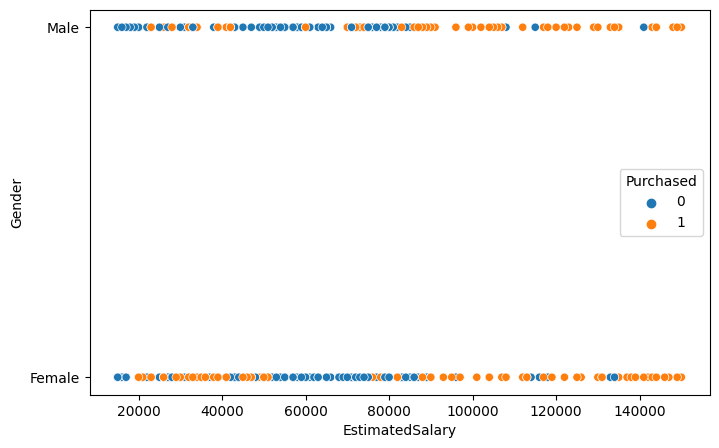

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="EstimatedSalary", y="Gender", hue="Purchased", data=df)

<AxesSubplot: xlabel='Age', ylabel='Gender'>

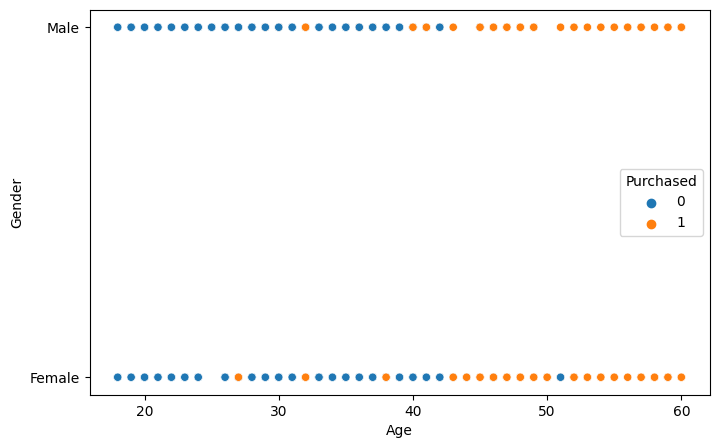

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Gender", hue="Purchased", data=df)

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Age'>

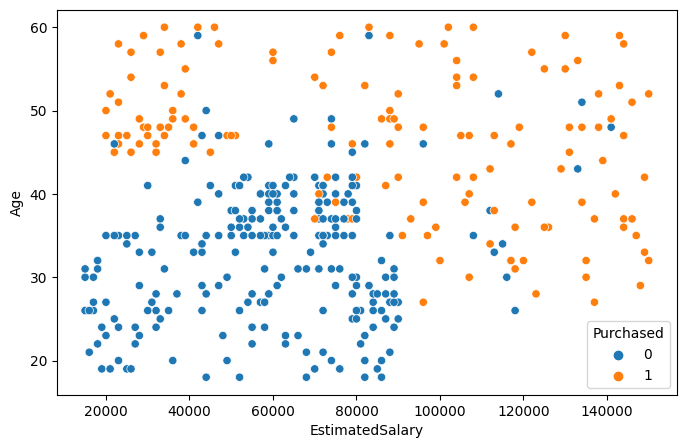

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="EstimatedSalary", y="Age", hue="Purchased", data=df)

In [12]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df.Gender = LE.fit_transform(df.Gender)

### Splitting the dataset into the Training set and Test set

In [13]:
x = df.loc[:,["Age", "EstimatedSalary"]].values
y = df.loc[:,"Purchased"].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Step 2 | Logistic Regression Model

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

### Fitting Logistic Regression to the Training set

In [17]:
LR.fit(x_train, y_train)

LogisticRegression()

## Step 3 | Prediction

In [18]:
LR.coef_

array([[2.21246401, 1.10102891]])

In [19]:
LR.intercept_

array([-0.97731124])

In [20]:
y_pred = LR.predict(x_test)

## Step 4 | Evaluating The Prediction

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
s = f1_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
print("The Accuracy score of the model is", a)
print("The f1_score of the model is", s)
print("AUC Score of the model is:",roc_auc_score(y_test, y_pred))

The Accuracy score of the model is 0.8833333333333333
The f1_score of the model is 0.8250000000000001
AUC Score of the model is: 0.8644643408459401


### Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[73,  6],
       [ 8, 33]], dtype=int64)

### Visualization

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, t = roc_curve(y_test, y_pred)

AUC Score of the model is: 0.8644643408459401


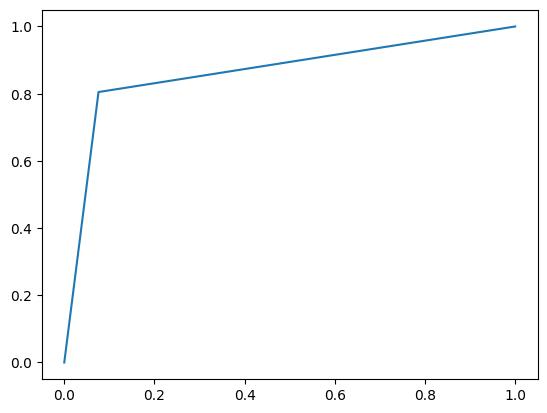

In [24]:
plt.plot(fpr,tpr)
print("AUC Score of the model is:",roc_auc_score(y_test, y_pred))

Train Accuracy: 0.6425 CV Score: 0.6425000000000001


C:\Users\Revanth\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


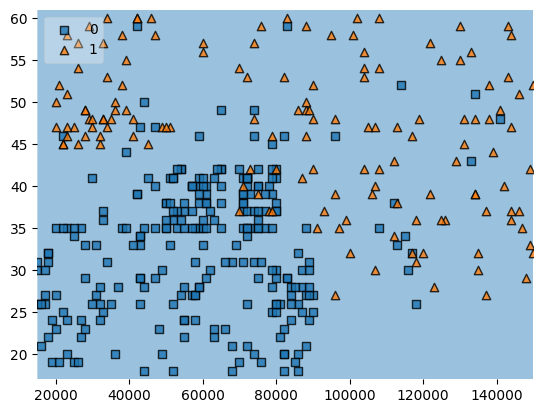

In [25]:
x = df[["EstimatedSalary","Age"]].values
y = df["Purchased"].astype(int).values
lr = LogisticRegression()
lr.fit(x,y)
from sklearn.model_selection import cross_val_score
print("Train Accuracy:", lr.score(x,y),"CV Score:", np.mean(cross_val_score(lr,x,y,cv=10)))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf=lr,legend=2)
plt.show()

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

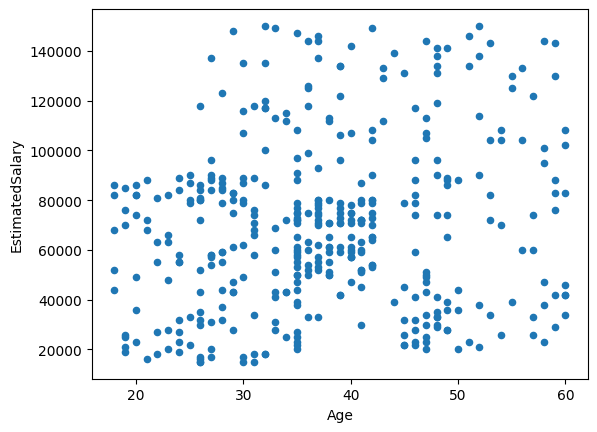

In [26]:
df.plot("Age","EstimatedSalary", kind="scatter")